In [ ]:
# Execute if necessary
# %%capture
# !pip install pandas

In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Práctica 7: Modelos Integrados (ARIMA y SARIMA)

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

__Para esta práctica se deben usar bibliotecas__. Se recomienda el uso de:

- scikit-learn (https://scikit-learn.org/stable/)
- plotly express (https://plotly.com/python/plotly-express/)
- statsmodels (https://www.statsmodels.org/stable/index.html).

## Asignación 1

Seleccione algun dataset de su preferencia que sea relacionado a series de tiempo. Particione sus datos para poder evaluar el desempeño de su práctica (__conjunto de test__).

In [ ]:
#importar csv kalimati_tarkari_dataset.csv y visualizarlo
import pandas as pd
import matplotlib.pyplot as plt
#importar plotly express
import plotly.express as px
import numpy as np

df = pd.read_csv('kalimati_tarkari_dataset.csv')
df.head()

In [ ]:
#Seleccionar en la columna Commodity las entradas con el valor 'Potato White' y visualizarlo
df = df[df['Commodity'] == 'Onion Dry (Indian)']
df.head(20)

## Asignación 2

Realice un análisis exploratorio de datos y el preprocesamiento necesario para el dataset seleccionado. El análisis realizado debe respaldar (preferentemente mediante el uso de gráficas) las decisiones que tome para la siguiente asignación.

In [ ]:
#Seleccionar las columnas Date, Average y visualizarlo
df_med = df[['Date', 'Average']]
df_low = df[['Date', 'Minimum']]
df_high = df[['Date', 'Maximum']]


df_med.head()

#graficar con plotly-express los 3 dataframes df_med, df_low y df_high 
fig = px.line(df_med, x='Date', y='Average', title='Average')
fig.show()

In [ ]:
df_med.head()

In [ ]:
#dividir el dataframe df_med en 2 dataframes: df_train y df_test en 80% y 20% respectivamente

X = df_med.iloc[:, :-1].values
y = df_med.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Asignación 3

Ajuste un modelo ARMA, ARIMA o SARIMA segun sea conveniente para sus datos.

Para poder evaluar que modelo nos conviene más optamos por seguir los siguientes pasos: 

Aquí hay algunos pasos que puedes seguir para evaluar qué modelo es más apropiado:

- __Visualización de datos:__ Comienza por trazar la serie temporal de los datos que tienes, es decir, los valores promedio en función de la fecha. Esto te permitirá observar cualquier patrón evidente, tendencia o estacionalidad.

- __Estacionariedad:__ Evalúa si la serie temporal es estacionaria. Una serie estacionaria es aquella cuyas propiedades estadísticas (como media y varianza) son constantes en el tiempo. Puedes utilizar métodos como la prueba de Dickey-Fuller aumentada (ADF) para verificar la estacionariedad.


- __Autocorrelación:__ Examina la autocorrelación de la serie temporal. La autocorrelación es la relación entre los valores pasados y futuros en una serie temporal. Puedes utilizar la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) para evaluar la correlación en diferentes rezagos.
Componentes estacionales: Si observas patrones estacionales en los datos, como fluctuaciones regulares que se repiten, puedes considerar modelos como SARIMA que incorporan componentes estacionales.

### 1.- Visualizacion de datos

Visualizando la anterior grafica podemos observar que existe un patrón de fechas en finales de año

### 2.- Estacionariedad

adfuller es una función que realiza la prueba "Dickey-Fuller aumentada" para determinar si una serie temporal es estacionaria o no.
Es comúnmente utilizada para evaluar la presencia de raíces unitarias, lo que implica que la serie no es estacionaria.

La función adfuller calcula el estadistico de prueba de "Dickey-Fuller aumentada" y proporciona varios resultados importantes, incluyendo el valor del estadístico de prueba, el valor de p y los valores críticos para diferentes niveles de significancia. Estos resultados se utilizan para tomar decisiones sobre la estacionariedad de la serie temporal

p = es una medida que indica la evidencia en contra de la hipótesis nula.
En la prueba ADF, la hipótesis nula es que la serie temporal contiene una raíz unitaria, lo que implica que la serie no es estacionaria. La hipótesis alternativa es que la serie no contiene una raíz unitaria y, por lo tanto, es estacionaria.

El valor p calculado en la prueba ADF representa la probabilidad de obtener un valor del estadístico de prueba igual o más extremo que el observado, asumiendo que la hipótesis nula es verdadera. Si el valor p es menor que un umbral de significancia predefinido (por ejemplo, 0.05), se considera que hay evidencia suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa.

En resumen, un valor p bajo (p < umbral de significancia) sugiere que hay evidencia para rechazar la hipótesis nula y concluir que la serie temporal es estacionaria. Por otro lado, un valor p alto (p > umbral de significancia) sugiere que no hay suficiente evidencia para rechazar la hipótesis nula y se concluye que la serie no es estacionaria.

Es importante destacar que el umbral de significancia elegido es una decisión subjetiva y depende del contexto y los requisitos del análisis.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Extrae la columna de interés (Average en este caso)
average_data = df_med['Average']

# Aplica la prueba Dickey-Fuller aumentada
result = adfuller(average_data)

# Extrae los valores de la prueba y los p-valores
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Imprime los resultados
print(f'Estadístico ADF: {adf_statistic}')
print(f'p-valor: {p_value}')
print('Valores críticos:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

Si el p-valor es menor que un umbral de significancia (por ejemplo, 0.05), se puede inferir que la serie temporal es estacionaria. Además, si el estadístico ADF es menor que los valores críticos correspondientes, también sugiere estacionariedad.

Por lo que en este caso observamos que existe __ESTACIONARIDAD__

### 3.-Autocorrelacion



La función tsaplots en statsmodels.graphics de Python proporciona varias tramas (plots) para el análisis y visualización de series de tiempo. Esta función se utiliza en combinación con otros módulos y funciones de statsmodels para crear gráficos relacionados con el análisis de series temporales.

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

# Calcular autocorrelaciones
acf_values = sm.tsa.acf(df_med['Average'], nlags=20)
pacf_values = sm.tsa.pacf(df_med['Average'], nlags=20)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 4))

# Graficar función de autocorrelación (ACF)
tsaplots.plot_acf(df_med['Average'], lags=1000, ax=ax) 
""" La ACF muestra la correlación entre los valores pasados de la serie en función del retraso. 
Ayuda a identificar patrones de dependencia en la serie."""

# Graficar función de autocorrelación parcial (PACF)
tsaplots.plot_pacf(df_med['Average'], lags=1000, ax=ax) 
"""La PACF muestra la correlación entre los valores pasados de la serie después
de eliminar las correlaciones explicadas por los retrasos más cortos. 
Ayuda a identificar la contribución específica de cada retraso en la serie."""

# Configurar etiquetas y título
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Autocorrelation and Partial Autocorrelation')

# Mostrar el gráfico
plt.show()


- Modelos ARIMA y SARIMA: Si la serie es estacionaria y no muestra patrones estacionales evidentes, puedes considerar modelos ARIMA. Un modelo ARIMA es adecuado cuando hay una dependencia de los valores pasados y diferencias en los datos para hacerlos estacionarios. Si hay componentes estacionales, puedes considerar modelos SARIMA que extienden ARIMA para manejar la estacionalidad.

- Modelo ARMA: Si no hay necesidad de diferenciar los datos para hacerlos estacionarios y no hay patrones estacionales, un modelo ARMA puede ser apropiado. El modelo ARMA combina los componentes autorregresivos (AR) y de media móvil (MA) para modelar la dependencia y la estructura de ruido en la serie temporal.

In [ ]:
df_med

In [ ]:
df_med = df[['Date', 'Average']]

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
import itertools


df_med = df[['Date', 'Average']]

# Convertimos la columna 'Date' a formato de fecha
df_med['Date'] = pd.to_datetime(df_med['Date'])

# Fijamos 'Date' como el índice de nuestro DataFrame
df_med.set_index('Date', inplace=True)



# Definimos el rango p, d, q y P, D, Q, S para probar
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Buscamos la mejor combinación de parámetros
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = SARIMAX(df['Average'],
                              order = param,
                              seasonal_order = param_seasonal,
                              enforce_stationarity=True,
                              enforce_invertibility=True)
            res = tmp_mdl.fit()

            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            continue

print("Mejor Modelo SARIMA({}, {}) - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


### Mejor Modelo SARIMA((1, 1, 0), (0, 0, 0, 12)) - AIC:14709.674071706238

AIC = Akaike's Information Criterion, es un criterio de información utilizado para seleccionar el mejor modelo entre varios candidatos, es una medida de la calidad del ajuste del modelo y penaliza la complejidad del modelo

AIC se calcula utilizando la fórmula:

AIC = $$-2 * log - likehood + 2 * p $$ 

Donde: 
- log-likehood: Es una medida de la calidad del ajuste del modelo a los datos observados. Cuanto más cercano a cero, mejor es el ajuste.
- p: Número de parámetros en el modelo

En resumen: El AIC se utiliza como una métrica para comparar diferentes modelos SARIMA y seleccionar el AIC más bajo como el modelo preferido

In [ ]:
# Ajustamos el modelo SARIMA
#Mejor Modelo SARIMA((1, 1, 0), (0, 0, 0, 12)) - AIC:14709.674071706238

model = SARIMAX(df_med['Average'], order=(1, 1, 0), seasonal_order=(0, 0, 0, 12))


In [ ]:
df.head()

In [ ]:
#Seleccionar en la columna Commodity las entradas con el valor 'Potato White' y visualizarlo
df = df[df['Commodity'] == 'Onion Dry (Indian)']
df.head(20)

## Asignación 4

Realice un diagnostico de su modelo para verificar que es correcto.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

model_fit = model.fit(disp=False)
""" Ajuste el modelo SARIMA utilizando .fit() y asigna el
    resultado a la variable model_fit. El argumento disp = False 
    se utiliza para desactivar la visualización de información
    adicional durante el ajuste del modelo"""

# Diagnóstico del modelo
residuals = model_fit.resid # Calculo de los residuos del modelo ajustado y los asigna a la variable residuals


# Gráfico de autocorrelación de los residuos
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(residuals, ax=ax)
plt.xlabel('Retraso')
plt.ylabel('Autocorrelación')
plt.title('Gráfico de Autocorrelación de los Residuos')
plt.show()

# Gráfico de autocorrelación parcial de los residuos
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(residuals, ax=ax)
plt.xlabel('Retraso')
plt.ylabel('Autocorrelación Parcial')
plt.title('Gráfico de Autocorrelación Parcial de los Residuos')
plt.show()

## Asignación 5

Obtenga el forecast para los datos de test, grafique los valores reales y las predicciones en conjunto. Obtenga el error de regresión para los datos de test.

In [ ]:
############### AUN NO ESTÁ BIEN ################
# Restablecer el índice de los datos de prueba
test_data = test_data.reset_index(drop=True)

# Crear un nuevo DataFrame con las fechas correspondientes a los datos de prueba
forecast_dates = pd.date_range(start=test_data.index[0], periods=len(predictions), freq='D')
forecast = pd.DataFrame({'Date': forecast_dates, 'Forecast': predictions})

# Graficar los valores reales y las predicciones
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Average'], label='Valores reales')
plt.plot(forecast['Date'], forecast['Forecast'], label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores reales vs. Predicciones')
plt.legend()
plt.show()

# Calcular el error de regresión
mse = mean_squared_error(test_data['Average'], predictions)
rmse = np.sqrt(mse)
print('Error de regresión (RMSE):', rmse)


In [ ]:

test_data = test_data.reset_index(drop=True)
""" Establece el índice de los datos de prueba a un 
    índice numérico continuo, lo que permitirá que el pronóstico
    se realice correctamente."""

In [ ]:
############### AUN NO ESTÁ BIEN ################ # ME SALE ERROR EN EL INDICE #####
# Obtener el pronóstico para los datos de prueba
forecast = model_fit.get_forecast(steps=len(test_data))
""" Se utiliza el método get_forecast() del modelo ajustado
    anteriormente (model_fit) para obtener el pronóstico 
    para los datos de prueba. El argumento 'steps' se establece
    en la longitud de los datos de prueba para obtener el 
    pronóstico para ese número de pasos hacia adelante"""

# Obtener los valores pronosticados y los intervalos de confianza
predicted_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

""" Se extraen los valores pronosticados utilizando el atributo
    predict_mean del objeto forecast. Además, obtenemos los intervalos
    de confianza utilizando el método conf_int del objeto forecast, 
    que devuelva una matriz de forma (n_steps,2) que contiene los
    límites inferior y superior del intervalo de confianza para cada paso
    pronosticado"""

# Crear un rango de fechas para los datos de prueba
dates = pd.date_range(start=test_data.index[0], periods=len(test_data))
""" Se crea un rango de fehcas utilizando la función pd.date_range().
    Especificamos el inicio como la primera fecha de los datos de prueba
    (test_data.index[0]) y el número de períodos igual a la longitud de 
    los datos de prueba (len(test_data)). Esto nos dará un rango de fechas 
    correspondiente a los datos de prueba"""

# Graficar los valores reales y las predicciones
plt.figure(figsize=(10, 6))
plt.plot(dates, test_data, label='Valores Reales')
plt.plot(dates, predicted_values, label='Predicciones')
plt.fill_between(dates, confidence_interval[:, 0], confidence_interval[:, 1], alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores Reales vs Predicciones')
plt.legend(loc='best')
plt.show()

# Calcular el error de regresión (RMSE)
mse = mean_squared_error(test_data, predicted_values)
rmse = np.sqrt(mse)
print(f'Error de Regresión (RMSE): {rmse}')
""" Se calcula el error de regresión utilizando la función
    mean_squared_error() de sklearn.metrics. El error cuadratico
    medio (MSE) se calcula comparando los valores reales (test_data)
    con los valores pronosticados predict_values. Luego, se toma la raíz
    cuadrada del MSE para obtener el error de regresión (RMSE). 
    Finalmente, se imprime el RMSE"""


## DEMO

In [5]:
def run_sarima_forecast(df_path):
    # Leer los datos de un archivo CSV
    df = pd.read_csv(df_path)

    # Seleccionar la columna de fecha y valor
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    series = df['Average']

    # Dividir los datos en entrenamiento y prueba
    train_data = series.iloc[:80]
    test_data = series.iloc[80:]

    # Crear y ajustar el modelo SARIMA
    order = (1, 1, 1)  # Orden de los componentes ARIMA
    seasonal_order = (0, 1, 1, 7)  # Orden de los componentes SARIMA
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)

    # Diagnóstico del modelo
    residuals = model_fit.resid
    fig, ax = plt.subplots(figsize=(8, 4))
    plot_acf(residuals, ax=ax)
    plt.xlabel('Retraso')
    plt.ylabel('Autocorrelación')
    plt.title('Gráfico de Autocorrelación de los Residuos')
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 4))
    plot_pacf(residuals, ax=ax)
    plt.xlabel('Retraso')
    plt.ylabel('Autocorrelación Parcial')
    plt.title('Gráfico de Autocorrelación Parcial de los Residuos')
    plt.show()

    # Realizar pronóstico en el conjunto de prueba
    test_data = test_data.reset_index(drop=True)
    start = len(train_data)
    end = len(train_data) + len(test_data) - 1
    predictions = model_fit.predict(start=start, end=end)

    # Crear DataFrame con las fechas y las predicciones
    forecast_dates = pd.date_range(start=test_data.index[-1], periods=len(predictions), freq='D')


    forecast = pd.DataFrame({'Date': forecast_dates, 'Forecast': predictions})

    # Graficar los valores reales y las predicciones
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data.values, label='Valores reales')
    plt.plot(forecast['Date'], forecast['Forecast'], label='Predicciones')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.title('Valores reales vs. Predicciones')
    plt.legend()
    plt.show()

    # Calcular el error de regresión
    mse = mean_squared_error(test_data.values, predictions)
    rmse = np.sqrt(mse)
    print('Error de regresión (RMSE):', rmse)


C:\Users\viane\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\viane\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\viane\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


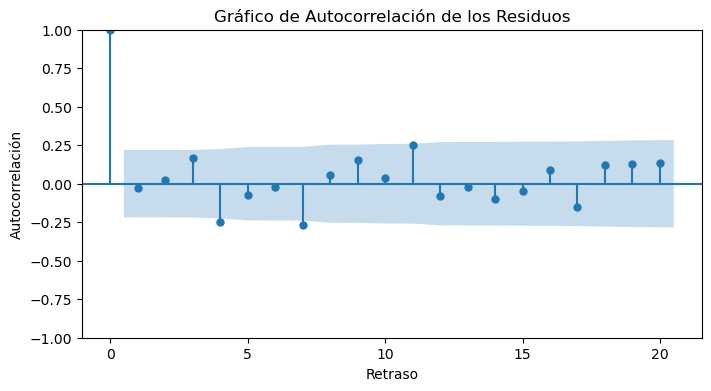

C:\Users\viane\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


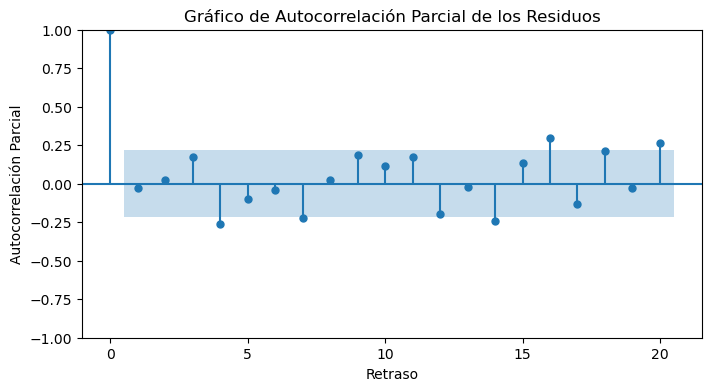

C:\Users\viane\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


OutOfBoundsDatetime: Cannot generate range with start=197080 and periods=197081

In [6]:
run_sarima_forecast('kalimati_tarkari_dataset.csv')